# Multiple Linear Regression

#### Problem Statement
Bike-sharing Case Study
Problem Statement:
A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. A US bike-sharing provider BoomBikes has recently suffered dips in their revenues. In order to restores the economy to a healthy state. BoomBikes aspires to understand the demand for shared bikes among the people.

Essentially, the company wants —

- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands

## Step 1: Reading and Understanding the Data

Let us first import NumPy and Pandas and read the bike-sharing dataset

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd

In [3]:
main_data = pd.read_csv("day.csv")

In [4]:
# Check the head of the dataset
main_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


Inspect the various aspects of the main_data dataframe

In [5]:
main_data.shape

(730, 16)

In [6]:
# checking the dataset info
main_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


- from info table it seems there is no null values 

In [7]:
# check the statistical description of numeric data
main_data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


## Step 2: Data Preparation

- As we can see there are some irrelevant comumns which is not neseceary, dropping them for better readability

In [8]:
# Drop irrelevant columns
columns_to_drop = ['instant', 'dteday', 'casual', 'registered']
cleaned_data = main_data.drop(columns=columns_to_drop, inplace= False)

In [9]:
# Renaming inappropriate name of columns
cleaned_data = cleaned_data.rename(columns={
    'weathersit':'weather',
    'yr':'year',
    'mnth':'month',
    'hum':'humidity',
    'cnt':'count'    
})

In [10]:
cleaned_data.head()

,season,year,month,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,count
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


### Creating dummy variables

To convert categorical variables like 'season', 'mnth' (month), 'weekday', and 'weathersit' to categorical types and create dummy variables for them, we can use the pd.get_dummies() function in pandas.

In [11]:
# Convert categorical variables to categorical type
cleaned_data['season']  = cleaned_data['season'].astype('category')
cleaned_data['month']   = cleaned_data['month'].astype('category')
cleaned_data['weekday'] = cleaned_data['weekday'].astype('category')
cleaned_data['weather'] = cleaned_data['weather'].astype('category')

In [12]:
# Create dummy variables
cleaned_data = pd.get_dummies(cleaned_data, columns=['season', 'month', 'weekday', 'weather'], drop_first=True)

In [13]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   year        730 non-null    int64  
 1   holiday     730 non-null    int64  
 2   workingday  730 non-null    int64  
 3   temp        730 non-null    float64
 4   atemp       730 non-null    float64
 5   humidity    730 non-null    float64
 6   windspeed   730 non-null    float64
 7   count       730 non-null    int64  
 8   season_2    730 non-null    bool   
 9   season_3    730 non-null    bool   
 10  season_4    730 non-null    bool   
 11  month_2     730 non-null    bool   
 12  month_3     730 non-null    bool   
 13  month_4     730 non-null    bool   
 14  month_5     730 non-null    bool   
 15  month_6     730 non-null    bool   
 16  month_7     730 non-null    bool   
 17  month_8     730 non-null    bool   
 18  month_9     730 non-null    bool   
 19  month_10    730 non-null    b

In [14]:
dummy_columns = ["season_2", "season_3", "season_4", "month_2", "month_3", "month_4", "month_5", "month_6", 
                 "month_7", "month_8", "month_9", "month_10", "month_11", "month_12", "weekday_1", 
                 "weekday_2", "weekday_3", "weekday_4", "weekday_5", "weekday_6", "weather_2", "weather_3"]

cleaned_data[dummy_columns] = cleaned_data[dummy_columns].astype(int)

In [15]:
cleaned_data.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,count,season_2,season_3,...,month_11,month_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weather_2,weather_3
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,0,0,...,0,0,1,0,0,0,0,0,1,0
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,0,0,0,0,1,0,0,0


## Step 3: Visualising the Data

Let's now spend some time doing what is arguably the most important step - **understanding the data**.
- If there is some obvious multicollinearity going on, this is the first place to catch it
- Here's where you'll also identify if some predictors directly have a strong association with the outcome variable

We'll visualise our data using `matplotlib` and `seaborn`.

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

#### Visualising Numeric Variables

Let's make a pairplot of all the numeric variables

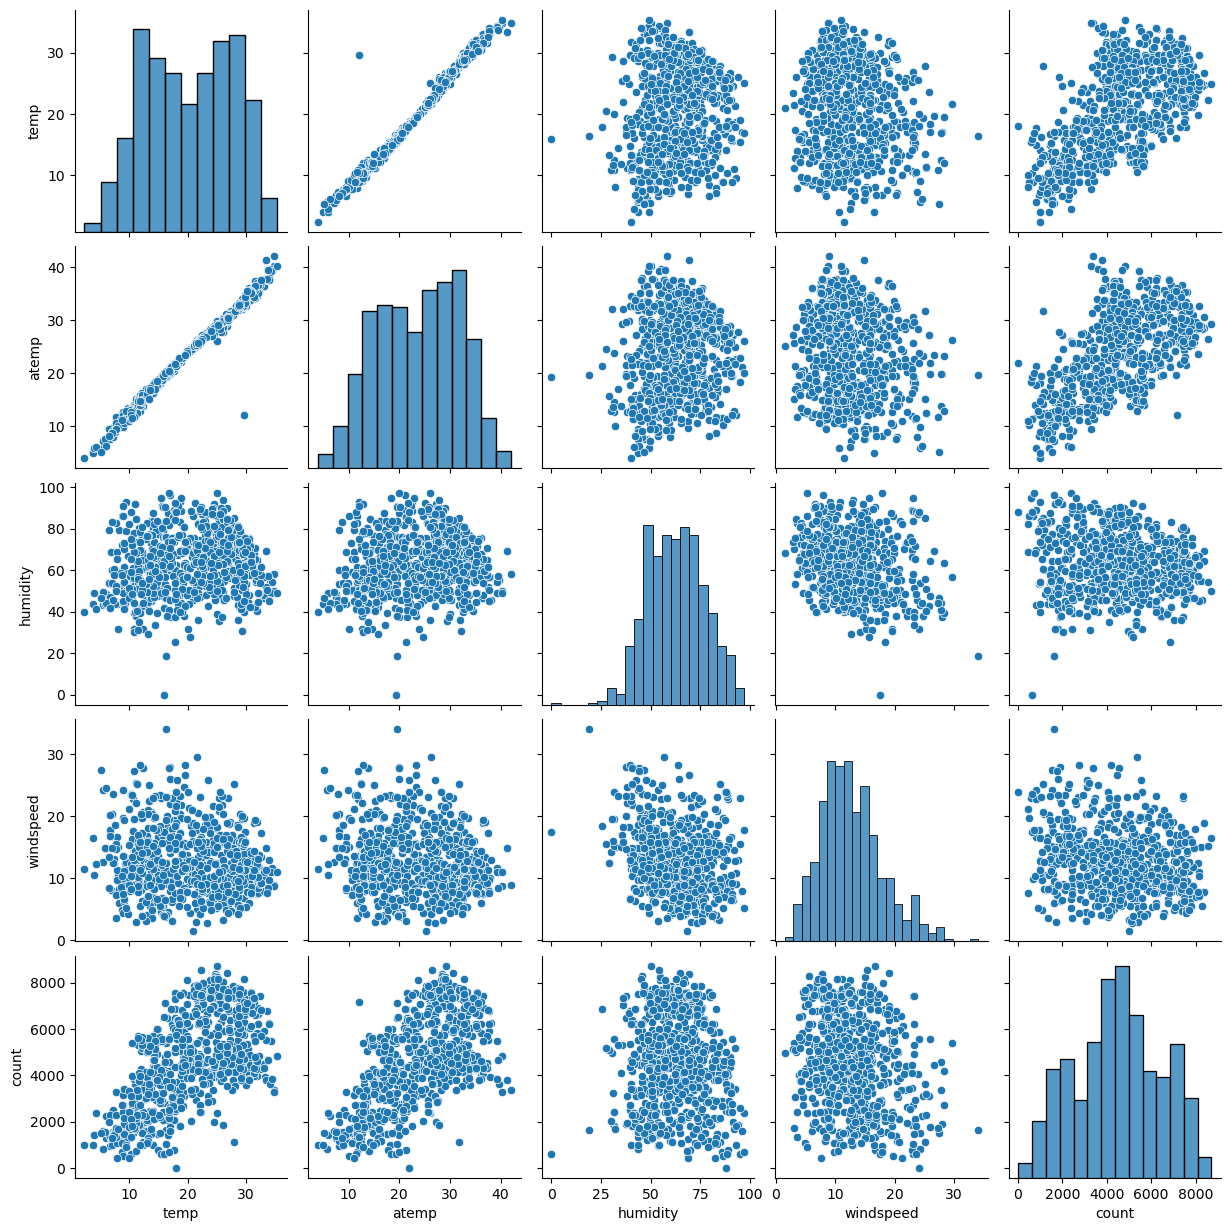

In [17]:
# Select relevant columns for the pair plot
numeric_vars = ['temp', 'atemp', 'humidity', 'windspeed', 'count']

# Create a pair plot
sns.pairplot(cleaned_data[numeric_vars])
plt.show()

- It seems cnt(target variable) has linear relationship with many numeric variables, so we can use regression here

#### Visualising Categorical Variables

As we have a few categorical variables as well. Let's make a boxplot for some of these variables to understand thier relation with target variable.

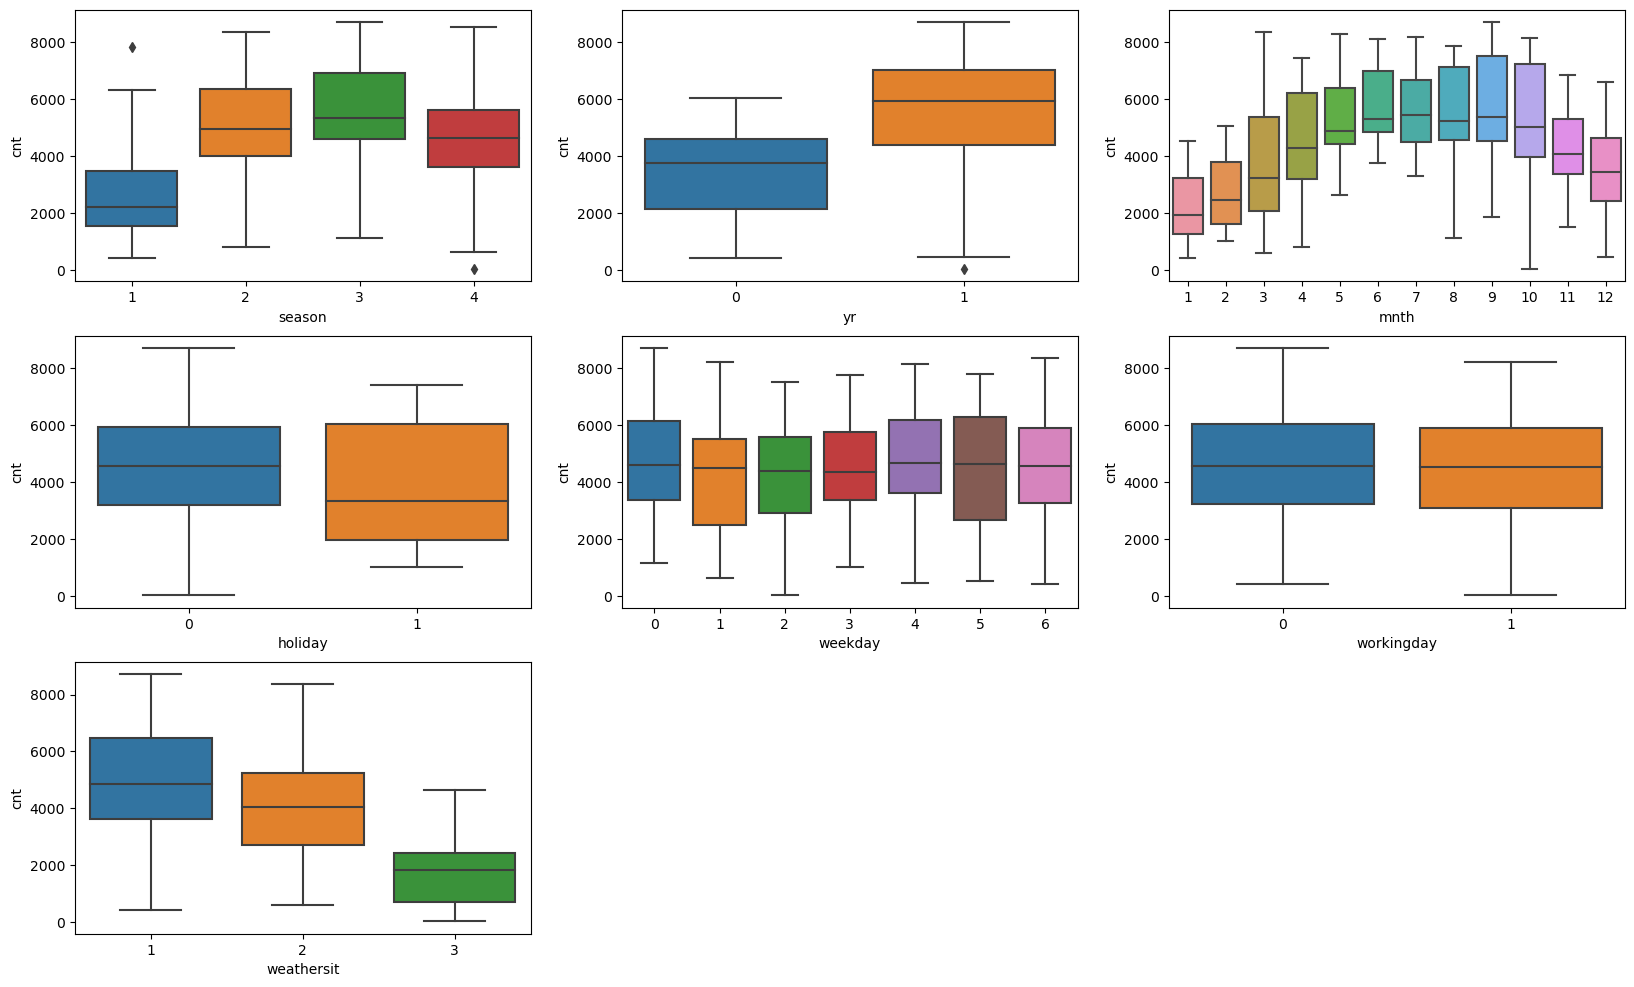

In [18]:
plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.boxplot(data = main_data, x = 'season', y = 'cnt')
plt.subplot(3,3,2)
sns.boxplot(data = main_data, x = 'yr', y = 'cnt')
plt.subplot(3,3,3)
sns.boxplot(data = main_data, x = 'mnth', y = 'cnt')
plt.subplot(3,3,4)
sns.boxplot(data = main_data, x = 'holiday', y = 'cnt')
plt.subplot(3,3,5)
sns.boxplot(data = main_data, x = 'weekday', y = 'cnt')
plt.subplot(3,3,6)
sns.boxplot(data = main_data, x = 'workingday', y = 'cnt')
plt.subplot(3,3,7)
sns.boxplot(data = main_data, x = 'weathersit', y = 'cnt')
plt.show()

Box plots provided visual insights into how the count of bike rentals (cnt) varies across different categories of the categorical variables. Here are some interpretations for each box plot:

1. **Season (season):**
    - The median count of bike rentals is higher in season 2 (summer) and season 3 (fall) as compared to season 1 (spring).
    - There is a wider interquartile range (IQR) in season 3 (fall) compared to other seasons, suggesting more variability in bike rentals during fall.

2. **Year (yr):**
    - The box plot for the year variable (yr) suggests that the demand for bike rentals is generally higher in 2019 (yr=1) compared to 2018 (yr=0).
    - The median demand is higher in 2019.

3. **Month (mnth):**
    - Bike rentals tend to be higher in the months of May to October (mnth 5 to 10), with July (mnth 7) having the highest median count.
    - The IQR is wider in the summer months, indicating more variability.

4. **Holiday (holiday):**
    - There is a noticeable difference in bike rentals on holidays (holiday=1) compared to non-holidays (holiday=0).
    - The median count is lower on holidays, and there is a larger IQR on non-holidays.

5. **Weekday (weekday):**
    - The box plots show variations in bike rentals across different weekdays.
    - The median demand appears relatively consistent across weekdays.
    - There is some variation in demand on weekdays, with higher median demand on days 4 (Friday) and 5 (Saturday).

6. **Working Day (workingday):**
    - The box plot for working day suggests that the demand for bike rentals is slightly higher on working days compared to non-working days.

7. **Weather Situation (weathersit):**
    - The box plots show variations in bike rentals based on weather situations.
    - The demand is higher on days with better weather conditions (weathersit=1) and lower on days with worse conditions (weathersit=2 and weathersit=3).

## Step 4: Splitting the Data into Training and Testing Sets

As the first basic step for regression is performing a train-test split.

In [19]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
training_data, test_data = train_test_split(cleaned_data, train_size = 0.7, test_size = 0.3, random_state = 100)

In [20]:
# check the shape of train-test data
print("training_data_shape :", training_data.shape)
print("test_data_shape :", test_data.shape)

training_data_shape : (510, 30)
test_data_shape : (219, 30)


### Rescaling the Features 

Rescaling columns is a common preprocessing step in machine learning to ensure that different features are on a similar scale. This is important for algorithms that are sensitive to the scale of the input variables, such as gradient-based methods. There are different techniques for rescaling, and the choice depends on the nature of our data. Here are two common rescaling methods:

1. Min-Max scaling 
2. Standardisation (mean-0, sigma-1) 

This time, we will use MinMax scaling.

In [21]:
from sklearn.preprocessing import MinMaxScaler

# Extracting the columns to rescale
columns_to_rescale = ['temp', 'atemp', 'humidity', 'windspeed', 'count']

# Min-Max Scaling
min_max_scaler = MinMaxScaler()
training_data[columns_to_rescale] = min_max_scaler.fit_transform(training_data[columns_to_rescale])

In [22]:
training_data.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,count,season_2,season_3,...,month_11,month_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weather_2,weather_3
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,...,0,0,0,0,1,0,0,0,0,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,1,...,0,0,0,0,1,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,0,...,0,0,0,0,0,0,0,0,1,0
728,1,0,1,0.245101,0.200348,0.498067,0.663106,0.204096,0,0,...,0,1,1,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,1,0,...,0,0,0,0,0,0,0,0,1,0


In [23]:
training_data.describe()

,year,holiday,workingday,temp,atemp,humidity,windspeed,count,season_2,season_3,...,month_11,month_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weather_2,weather_3
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.537262,0.512989,0.650369,0.320768,0.513620,0.245098,0.262745,...,0.086275,0.084314,0.154902,0.152941,0.135294,0.143137,0.147059,0.129412,0.343137,0.029412
std,0.500429,0.157763,0.453386,0.225844,0.212385,0.145882,0.169797,0.224593,0.430568,0.440557,...,0.281045,0.278131,0.362166,0.360284,0.342373,0.350557,0.354512,0.335985,0.475223,0.169124
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


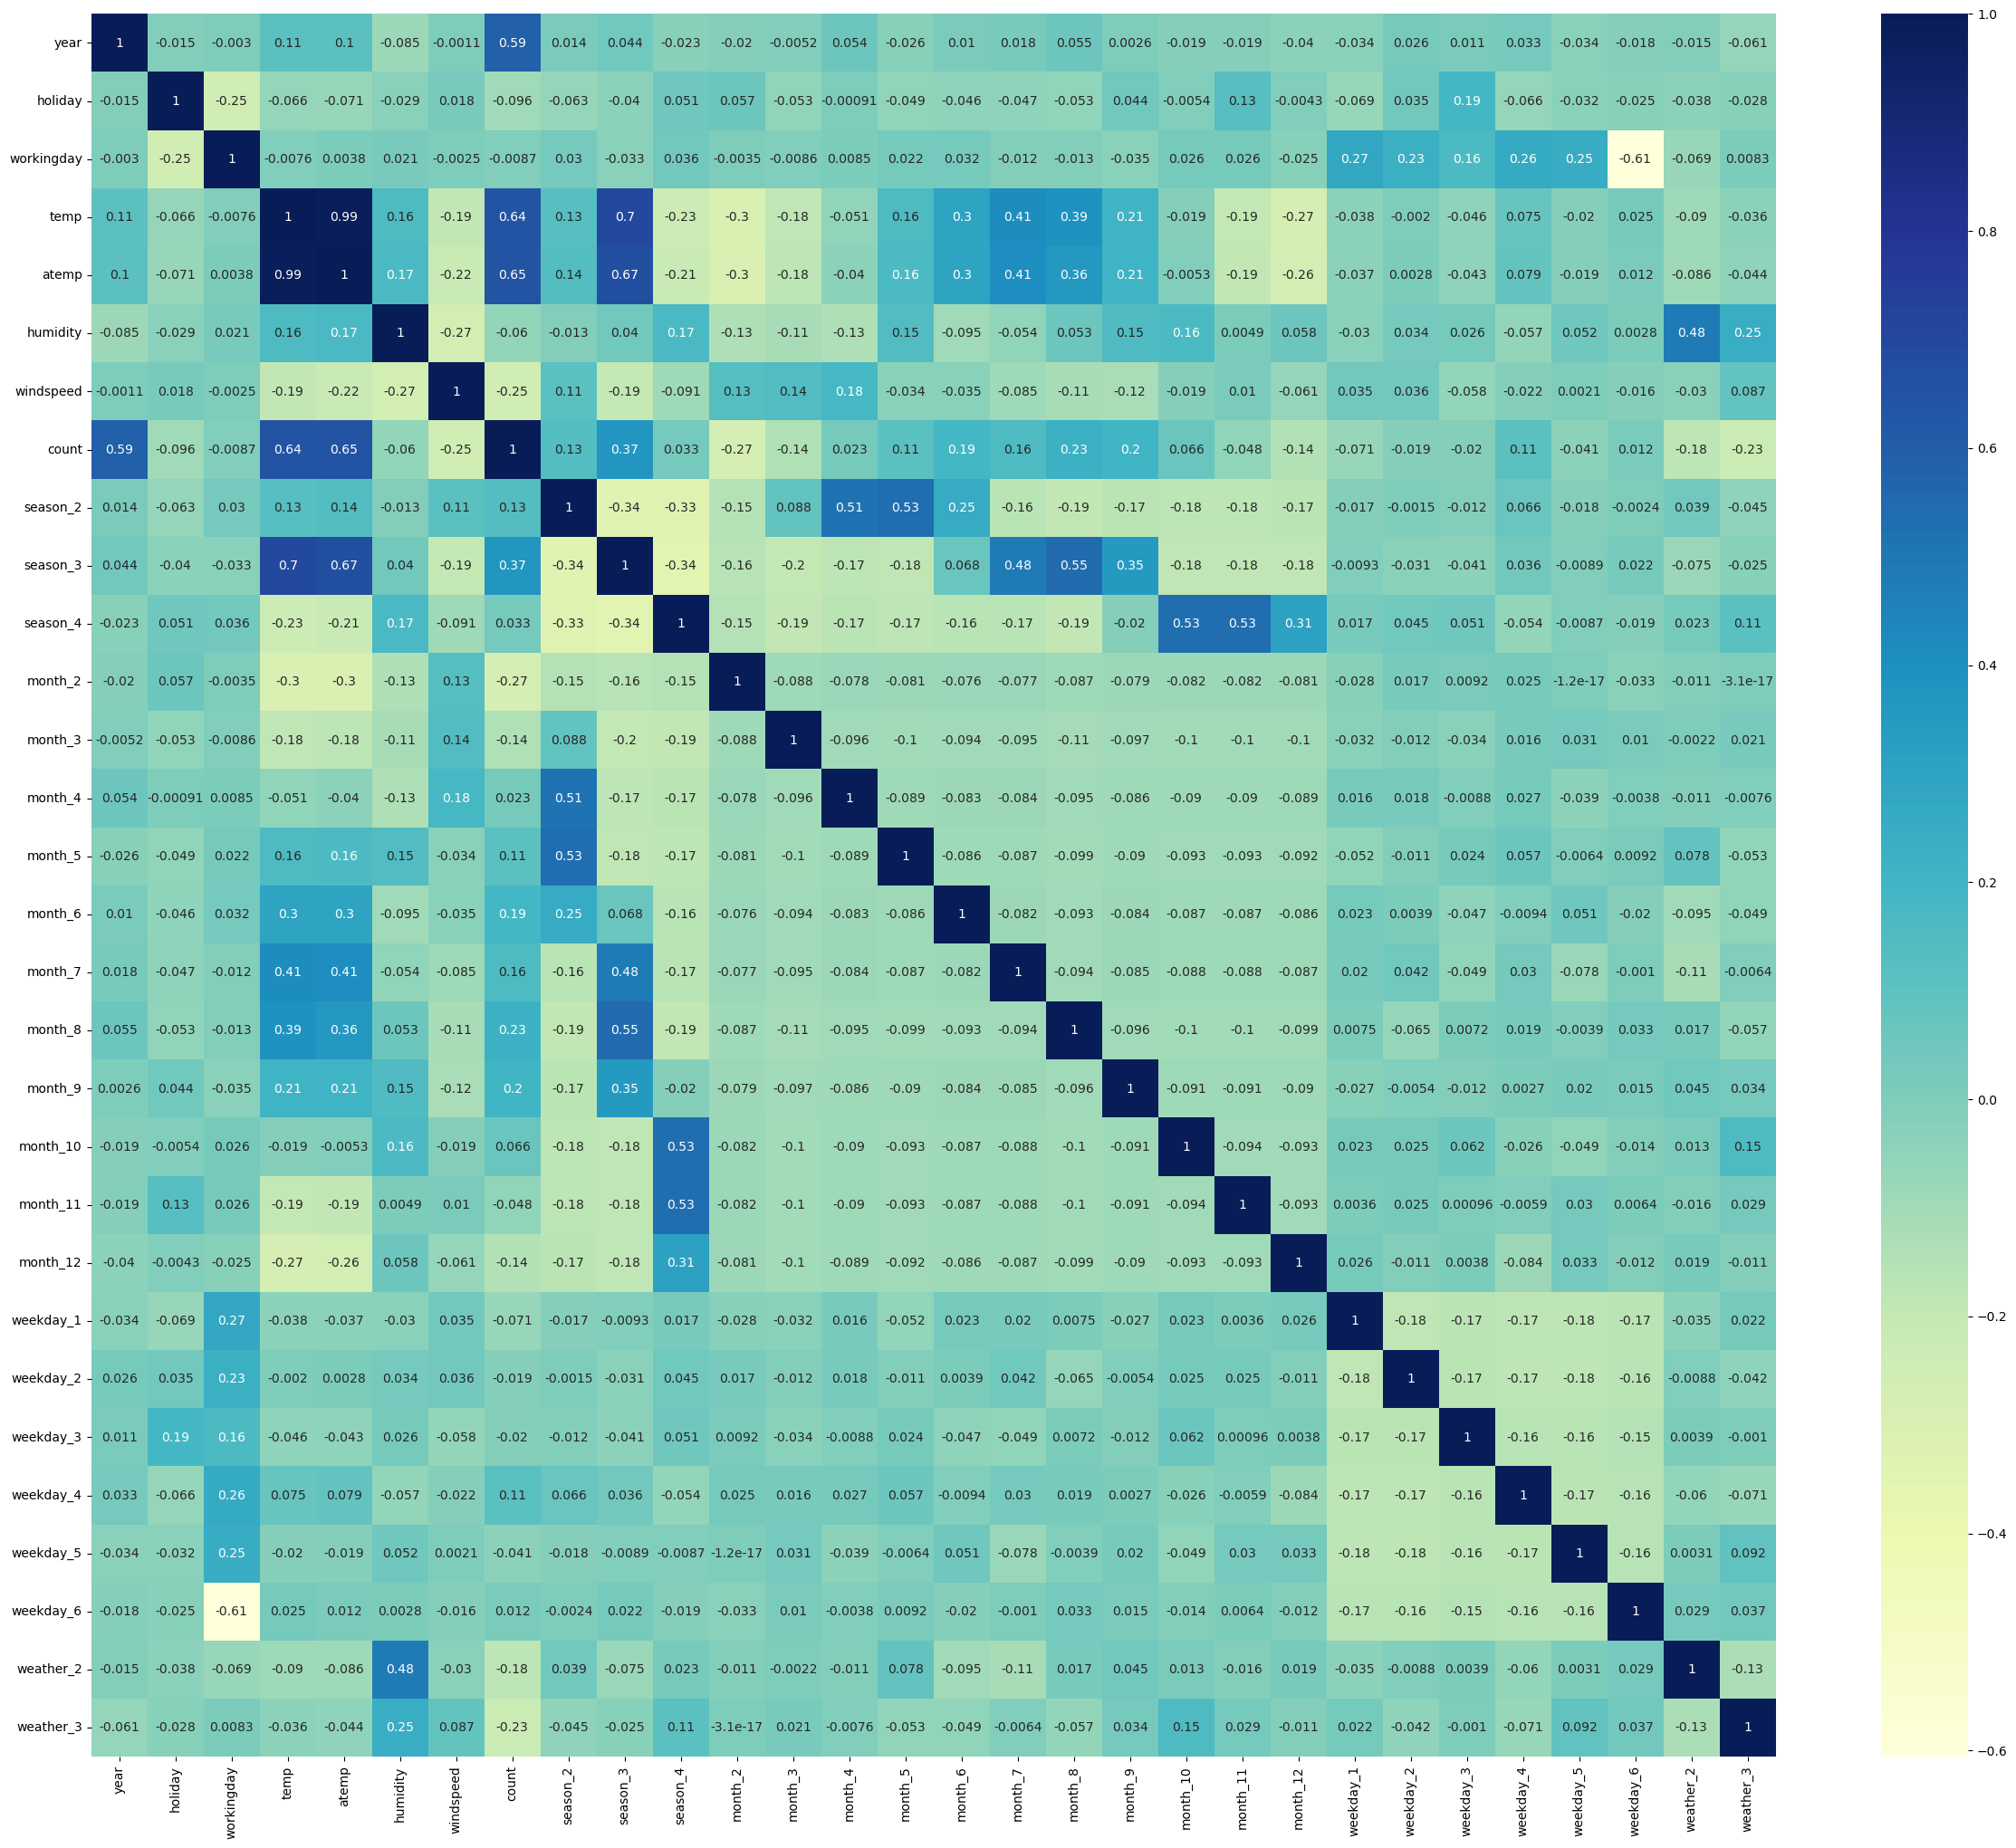

In [24]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (30,25))
sns.heatmap(training_data.corr(), annot = True, cmap="YlGnBu")
plt.show()

- count seems to be correlated with temp, atemp, year and season_3

### Dividing into X and Y sets for the model building

In [25]:
y_train = training_data.pop('count')
X_train = training_data

## Step 5: Building a linear model

### 1. Variables Selection with RFE: 
    - Use Recursive Feature Elimination (RFE) from scikit-learn to select a subset of features.

In [26]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Using Linear Regression as the estimator for RFE
estimator = LinearRegression()

# Initialize RFE
rfe = RFE(estimator, n_features_to_select=15) 

# Fit RFE to the training data
X_train_rfe = rfe.fit_transform(X_train, y_train)

# Get the selected features
selected_features = X_train.columns[rfe.support_]

In [27]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('year', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 5),
 ('temp', True, 1),
 ('atemp', False, 4),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('season_2', True, 1),
 ('season_3', True, 1),
 ('season_4', True, 1),
 ('month_2', False, 11),
 ('month_3', True, 1),
 ('month_4', False, 2),
 ('month_5', True, 1),
 ('month_6', False, 3),
 ('month_7', False, 12),
 ('month_8', True, 1),
 ('month_9', True, 1),
 ('month_10', True, 1),
 ('month_11', False, 13),
 ('month_12', False, 14),
 ('weekday_1', False, 9),
 ('weekday_2', False, 10),
 ('weekday_3', False, 8),
 ('weekday_4', False, 6),
 ('weekday_5', False, 7),
 ('weekday_6', False, 15),
 ('weather_2', True, 1),
 ('weather_3', True, 1)]

In [28]:
selected_features

Index(['year', 'holiday', 'temp', 'humidity', 'windspeed', 'season_2',
       'season_3', 'season_4', 'month_3', 'month_5', 'month_8', 'month_9',
       'month_10', 'weather_2', 'weather_3'],
      dtype='object')

In [29]:
X_train.columns[~rfe.support_]

Index(['workingday', 'atemp', 'month_2', 'month_4', 'month_6', 'month_7',
       'month_11', 'month_12', 'weekday_1', 'weekday_2', 'weekday_3',
       'weekday_4', 'weekday_5', 'weekday_6'],
      dtype='object')

In [30]:
# Using the selected features from RFE
X_train_rfe = X_train[selected_features]

### 2. Checking VIF:
     Now, check for multicollinearity using Variable Inflation Factor (VIF).

In [31]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["feature"] = X_train_rfe.columns
vif_data["VIF"] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]

Remove features with high VIF values (typically VIF > 5) as they indicate multicollinearity.
### 3. Building the Statsmodels Model:
Once you have the final set of features, you can build a linear regression model using statsmodels.

In [32]:
import statsmodels.api as sm

# Adding a constant to the features matrix (required for statsmodels)
X_rfe_sm = sm.add_constant(X_train_rfe)

# Fit the model
bike_model = sm.OLS(y_train, X_rfe_sm).fit()

# Display the model summary
print(bike_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     180.3
Date:                Fri, 24 Nov 2023   Prob (F-statistic):          2.95e-189
Time:                        16:40:47   Log-Likelihood:                 514.85
No. Observations:                 510   AIC:                            -997.7
Df Residuals:                     494   BIC:                            -929.9
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2376      0.027      8.689      0.0

In [33]:
vif_data

,feature,VIF
0,year,2.043147
1,holiday,1.047358
2,temp,24.636425
3,humidity,15.552173
4,windspeed,3.802927
5,season_2,3.733564
6,season_3,8.801538
7,season_4,3.133675
8,month_3,1.325287
9,month_5,1.684134


#### Dropping the variable and updating the model
As we can see from the summary and the VIF dataframe, some variables are still insignificant. One of these variables is, month_5 as it has a very high p-value of 0.087. Let's go ahead and drop this variables

In [34]:
# Dropping highly correlated variables and insignificant variables

X_train_rfe = X_train_rfe.drop('month_5', axis = 1)

In [35]:
# Add a constant term for the intercept
X_rfe_sm = sm.add_constant(X_train_rfe)  

# Build the second fitted model
bike_model_2 = sm.OLS(y_train, X_rfe_sm).fit()

# Print the summary
print(bike_model_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     192.2
Date:                Fri, 24 Nov 2023   Prob (F-statistic):          9.02e-190
Time:                        16:40:47   Log-Likelihood:                 513.33
No. Observations:                 510   AIC:                            -996.7
Df Residuals:                     495   BIC:                            -933.1
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2321      0.027      8.530      0.0

In [36]:
# Calculate the VIFs again for the new model
vif_data = pd.DataFrame()
vif_data["feature"] = X_train_rfe.columns
vif_data["VIF"] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif_data = vif_data.sort_values(by = "VIF", ascending = False)
vif_data

,feature,VIF
2,temp,24.013562
3,humidity,15.506458
6,season_3,8.529220
4,windspeed,3.731405
5,season_2,3.511058
7,season_4,3.072693
12,weather_2,2.145900
0,year,2.032725
9,month_8,1.850383
11,month_10,1.638042


#### Dropping the second variable and updating the model

From second model and updated VIF, season_3 still seems insignificant with p-value 0.106, let's drop this variable.

In [37]:
# Dropping highly correlated variables and insignificant variables

X_train_rfe = X_train_rfe.drop('season_3', axis = 1)

In [38]:
# Add a constant term for the intercept
X_rfe_sm = sm.add_constant(X_train_rfe)  

# Build the third fitted model
bike_model_3 = sm.OLS(y_train, X_rfe_sm).fit()

# Print the summary
print(bike_model_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     206.1
Date:                Fri, 24 Nov 2023   Prob (F-statistic):          2.26e-190
Time:                        16:40:47   Log-Likelihood:                 511.99
No. Observations:                 510   AIC:                            -996.0
Df Residuals:                     496   BIC:                            -936.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2324      0.027      8.529      0.0

In [39]:
# Calculate the VIFs again for the new model
vif_data = pd.DataFrame()
vif_data["feature"] = X_train_rfe.columns
vif_data["VIF"] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif_data = vif_data.sort_values(by = "VIF", ascending = False)
vif_data

,feature,VIF
3,humidity,14.746120
2,temp,10.012425
4,windspeed,3.694769
6,season_4,2.342297
11,weather_2,2.135135
0,year,2.018578
5,season_2,1.827258
8,month_8,1.610486
10,month_10,1.607208
9,month_9,1.343876


#### Dropping the third variable and updating the model
From third model and updated VIF, humidity still have high VIF 14.746120. Now we are dropping this variable.

In [40]:
# Dropping highly correlated variables and insignificant variables

X_train_rfe = X_train_rfe.drop('humidity', axis = 1)

In [41]:
# Add a constant term for the intercept
X_rfe_sm = sm.add_constant(X_train_rfe)  

# Build the forth fitted model
bike_model_4 = sm.OLS(y_train, X_rfe_sm).fit()

# Print the summary
print(bike_model_4.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     212.0
Date:                Fri, 24 Nov 2023   Prob (F-statistic):          1.10e-186
Time:                        16:40:47   Log-Likelihood:                 500.43
No. Observations:                 510   AIC:                            -974.9
Df Residuals:                     497   BIC:                            -919.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1293      0.017      7.558      0.0

In [42]:
# Calculate the VIFs again for the new model
vif_data = pd.DataFrame()
vif_data["feature"] = X_train_rfe.columns
vif_data["VIF"] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif_data = vif_data.sort_values(by = "VIF", ascending = False)
vif_data

,feature,VIF
2,temp,5.110849
3,windspeed,3.295856
0,year,2.008822
5,season_4,1.980878
4,season_2,1.818714
7,month_8,1.605860
9,month_10,1.598977
10,weather_2,1.489441
8,month_9,1.343183
6,month_3,1.188727


There is a weak correlation(0.16) between `temp` and `humidity`. However, variable temp had a high VIF (10.012) and dropping humidity reduces the VIF, it suggests that there might be multicollinearity between temp and humidity.

#### Dropping the fourth variable and updating the model¶
From fourth model and updated VIF, month_3 still has high p-value 0.082, which indicate that this is still insignificant.

In [43]:
# Dropping highly correlated variables and insignificant variables

X_train_rfe = X_train_rfe.drop('month_3', axis = 1)

In [44]:
# Add a constant term for the intercept
X_rfe_sm = sm.add_constant(X_train_rfe)  

# Build the fifth fitted model
bike_model_5 = sm.OLS(y_train, X_rfe_sm).fit()

# Print the summary
print(bike_model_5.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     230.1
Date:                Fri, 24 Nov 2023   Prob (F-statistic):          3.21e-187
Time:                        16:40:47   Log-Likelihood:                 498.87
No. Observations:                 510   AIC:                            -973.7
Df Residuals:                     498   BIC:                            -922.9
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1355      0.017      8.079      0.0

In [45]:
# Calculate the VIFs again for the new model
vif_data = pd.DataFrame()
vif_data["feature"] = X_train_rfe.columns
vif_data["VIF"] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif_data = vif_data.sort_values(by = "VIF", ascending = False)
vif_data

,feature,VIF
2,temp,5.110133
3,windspeed,3.108936
0,year,2.003349
5,season_4,1.945267
4,season_2,1.818691
8,month_10,1.598453
6,month_8,1.592096
9,weather_2,1.485210
7,month_9,1.336800
10,weather_3,1.094385


#### Dropping the fifth variable and updating the model¶
From fifth model and updated VIF, month_10 has high p-value 0.054.

In [46]:
# Dropping highly correlated variables and insignificant variables

X_train_rfe = X_train_rfe.drop('month_10', axis = 1)

In [47]:
# Add a constant term for the intercept
X_rfe_sm = sm.add_constant(X_train_rfe)  

# Build the sixth fitted model
bike_model_6 = sm.OLS(y_train, X_rfe_sm).fit()

# Print the summary
print(bike_model_6.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     251.3
Date:                Fri, 24 Nov 2023   Prob (F-statistic):          1.26e-187
Time:                        16:40:47   Log-Likelihood:                 496.97
No. Observations:                 510   AIC:                            -971.9
Df Residuals:                     499   BIC:                            -925.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1312      0.017      7.871      0.0

In [48]:
# Calculate the VIFs again for the new model
vif_data = pd.DataFrame()
vif_data["feature"] = X_train_rfe.columns
vif_data["VIF"] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif_data = vif_data.sort_values(by = "VIF", ascending = False)
vif_data

,feature,VIF
2,temp,5.010919
3,windspeed,3.102202
0,year,1.999807
4,season_2,1.807460
6,month_8,1.581168
5,season_4,1.487426
8,weather_2,1.484914
7,month_9,1.306995
9,weather_3,1.080955
1,holiday,1.035984


#### After dropping month_10, the model has been further refined, and here are the key observations:

### Model Performance :
   1. **R-squared:** The R-squared value is `0.834`, indicating that the model explains approximately `83.4%` of the variance in the dependent variable.
   2. **Adjusted R-squared:** The adjusted R-squared is `0.831`, considering the number of predictors.

### Coefficients and Significance:
1. **Year (year):** The coefficient is `0.2325`, and the p-value is very low (p < 0.05), indicating a significant positive effect on the target variable.
2. **Temperature (temp):** The coefficient is `0.5174`, indicating a positive relationship between temperature and bike rentals. The p-value is very low.
3. **Windspeed (windspeed):** The coefficient is `-0.1497`, suggesting a negative impact on bike rentals as windspeed increases. The p-value is very low.
4. **Seasonal Variables (season_2 and season_4):** Both have significant coefficients, indicating a seasonal effect on bike rentals.

### VIF (Variance Inflation Factor):
1. **VIF Values:** The VIF values have decreased compared to the previous models, indicating a reduction in multicollinearity.


## Step 6: Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [49]:
y_train_pred = bike_model_6.predict(X_rfe_sm)

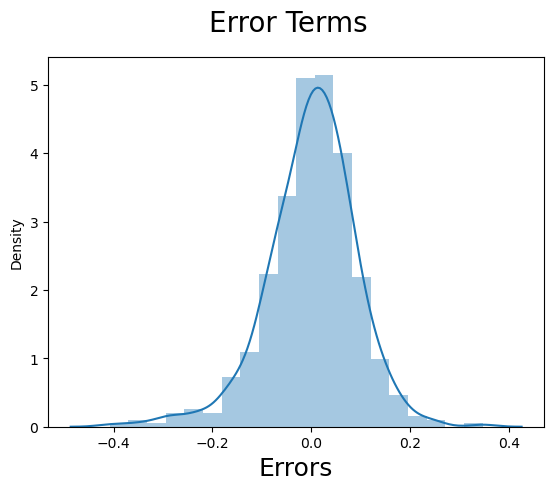

In [50]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label
plt.show()

- The distribution plot suggest that the residuals are centered around zero(-6.661338e-17) and have a relatively small spread, indicating that the model is making predictions with reasonable accuracy. The distribution plot also suggests that the residuals follow a roughly normal distribution.

## Step 7: Making Predictions Using the Final Model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final, i.e. sixth model.

#### Applying the scaling on the test sets

In [51]:
# Transform both the training and test data
test_data[columns_to_rescale] = min_max_scaler.transform(test_data[columns_to_rescale])

In [52]:
test_data.describe()

,year,holiday,workingday,temp,atemp,humidity,windspeed,count,season_2,season_3,...,month_11,month_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weather_2,weather_3
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.639269,0.558941,0.532991,0.638508,0.313350,0.520592,0.264840,0.246575,...,0.073059,0.086758,0.118721,0.123288,0.155251,0.141553,0.132420,0.173516,0.319635,0.027397
std,0.500722,0.188034,0.481313,0.233698,0.217888,0.148974,0.159947,0.218435,0.442259,0.432005,...,0.260830,0.282125,0.324202,0.329520,0.362974,0.349389,0.339723,0.379560,0.467403,0.163612
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354650,0.344751,0.527265,0.198517,0.377531,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558691,0.549198,0.627737,0.299459,0.524275,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.759096,0.714132,0.743928,0.403048,0.672745,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Dividing into X_test and y_test

In [53]:
y_test = test_data.pop('count')
X_test = test_data

In [54]:
X_test = X_test[selected_features]
X_test = X_test.drop(columns=["humidity", "season_3", "month_3", "month_5", "month_10"])
X_test.head()

,year,holiday,temp,windspeed,season_2,season_4,month_8,month_9,weather_2,weather_3
184,0,1,0.831783,0.084219,0,0,0,0,1,0
535,1,0,0.901354,0.153728,1,0,0,0,0,0
299,0,0,0.511964,0.334206,0,1,0,0,1,0
221,0,0,0.881625,0.339570,0,0,1,0,0,0
152,0,0,0.817246,0.537414,1,0,0,0,0,0


In [55]:
# Adding constant variable to test dataframe
X_test_sm = sm.add_constant(X_test)

In [56]:
# Making predictions using the sixth model

y_test_pred = bike_model_6.predict(X_test_sm)

## Step 8: Model Evaluation

Let's now plot the graph for actual versus predicted values.

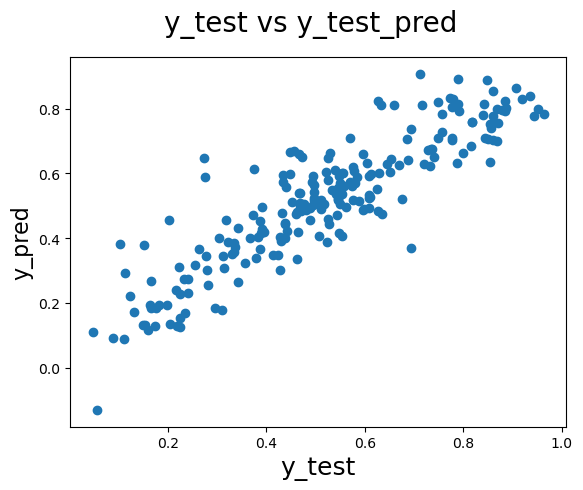

In [57]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize = 20)         # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)   
plt.show()


We can see that the equation of our best fitted line is:

$count = 0.2325  \times  year - 0.0971  \times  holiday + 0.5174  \times  temp - 0.1497 \times windspeed + 0.1000 \times season_2 + 0.1383 \times season_4 + 0.0542 \times month_8 + 0.1162 \times month_9 - 0.0825 \times weather_2 - 0.2828 \times weather_3 $


### r_squared_test

In [58]:
from sklearn.metrics import r2_score
r2_score(y_test, y_test_pred)

0.7931434526028904

`R-squared (coefficient of determination) value of 0.793 indicates that approximately 79.3% of the variance in the dependent variable (count) can be explained by model(bike_model_6). This is a relatively high R-squared value and suggests that linear regression model "bike_model_6" is able to capture a substantial portion of the variability in the target variable.`

## <Font color = blue> Valuable insights from regression model </font>


### 1. Year (Predictor: year):
-  **Interpretation:** Holding all other factors constant, the year has a positive coefficient of 0.2325.
-  **Practical Insight:** The demand for shared bikes is increasing over the years. This could be due to a growing popularity of bike-sharing services.

### 2. Holiday (Predictor: holiday):
- **Interpretation:** On holidays, there is a decrease in the predicted bike count by approximately 0.0971.
- **Practical Insight:** Holidays might see a reduced demand for shared bikes, possibly because people are engaged in other activities or travel patterns change.

### 3. Temperature (Predictor: temp):
- **Interpretation:** For each one-unit increase in temperature, the predicted bike count increases by 0.5174.
- **Practical Insight:** Warmer temperatures are associated with higher bike usage. People are more likely to use shared bikes in favorable weather conditions.

### 4. Windspeed (Predictor: windspeed):
- **Interpretation:** With each one-unit increase in windspeed, the predicted bike count decreases by 0.1497.
- **Practical Insight:** Higher windspeed might deter people from using shared bikes. Windy conditions could make riding less comfortable.

### 5. Seasons (Predictors: season_2, season_4):
- **Interpretation:** Being in season_2 (summer) and season_4 (winter) is associated with an increase in predicted bike count.
- **Practical Insight:** Summer and winter seasons contribute positively to bike demand, possibly due to pleasant weather and seasonal activities.

### 6. Months (Predictors: month_8, month_9):
- **Interpretation:** Being in August (month_8) and September (month_9) is associated with an increase in predicted bike count.
- **Practical Insight:** Late summer and early fall months show higher demand, possibly due to vacations, outdoor events, or commuting patterns.

### 7. Weather Conditions (Predictors: weather_2, weather_3):
- **Interpretation:** Being in weather_2 (partly cloudy) and weather_3 (light rain, thunderstorm) is associated with a decrease in predicted bike count.
- **Practical Insight:** Unfavorable weather conditions, such as rain or overcast skies, are linked to lower bike demand. People might prefer alternative transportation during adverse weather.

### Significant Variables:

#### Significant Positive Impact:
1. **Year (year):** The positive coefficient suggests that the year is a significant variable in predicting bike demand. The increasing trend in demand is statistically supported.
2. **Temperature (temp):** The positive coefficient indicates that temperature is a significant predictor. Warmer temperatures positively influence bike demand.
3. **Seasons (season_2, season_4):** Being in summer (season_2) and winter (season_4) significantly increases bike demand.
4. **Months (month_8, month_9):** August (month_8) and September (month_9) show significant positive impact on bike demand.
#### Significant Negative Impact:
1. **Holiday (holiday):** The negative coefficient for holidays suggests a significant decrease in bike demand on holidays.
2. **Windspeed (windspeed):** The negative coefficient indicates that higher windspeed has a significant negative impact on bike demand.
3. **Weather Conditions (weather_2, weather_3):** Partly cloudy weather (weather_2) and light rain, thunderstorm (weather_3) have a significant negative impact on bike demand.